# LAB | Unsupervised learning

## Import libraries here

In [ ]:
# Your code here

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

## Import and Describe the Dataset

- In this lab, we will use a dataset containing information about customer preferences.
- We will look at how much each customer spends in a year on each subcategory in the grocery store and try to find similarities using clustering.
- The origin of the dataset is [here](https://archive.ics.uci.edu/ml/datasets/wholesale+customers).
- Import the dataset and store in a variable called `customers`

In [ ]:
# Your code here

In [2]:
customers = pd.read_csv('data/wholesale_customers.csv')

### Explore the dataset with mathematical and visualization techniques. What do you find?

Checklist:

- What does each column mean?
- Any categorical data to convert?
- Any missing data to remove?
- Column collinearity - any high correlations?
- Descriptive statistics - any outliers to remove?
- Column-wise data distribution - is the distribution skewed?

In [ ]:
# Your code here

In [3]:
customers.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [4]:
# data types
customers.dtypes

Channel             int64
Region              int64
Fresh               int64
Milk                int64
Grocery             int64
Frozen              int64
Detergents_Paper    int64
Delicassen          int64
dtype: object

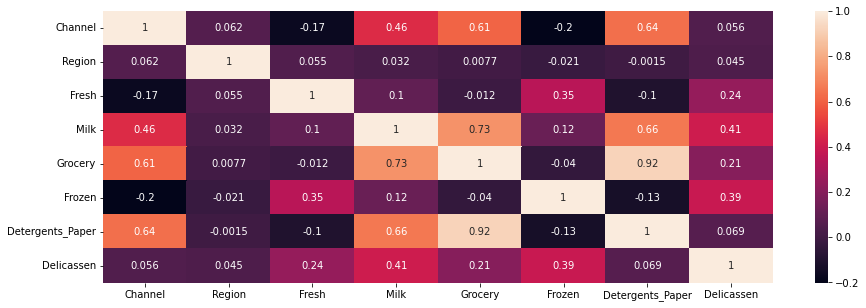

In [5]:
# heatmap with correlations
plt.figure(figsize=(15,5))
sns.heatmap(customers.corr(), annot=True);

In [6]:
# null values
customers.isna().sum()

Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64

In [7]:
# categorical variables
customers.Channel.value_counts()

1    298
2    142
Name: Channel, dtype: int64

In [8]:
# categorical variables
customers.Region.value_counts()

3    316
1     77
2     47
Name: Region, dtype: int64

In [9]:
customers.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


- Plot a histogram for each variable in `customers` dataset.

In [ ]:
# Your code here

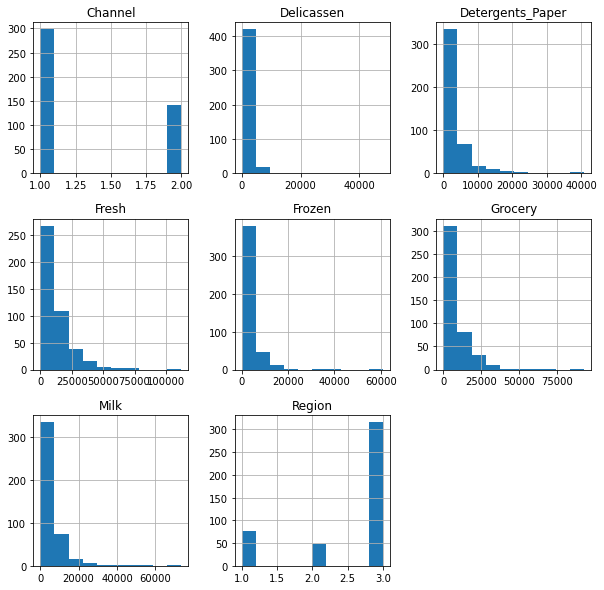

In [10]:
customers.hist(figsize=(10,10));

`Our data shows fresh produce expenses ranging from 3 to over 112k. While this is a big range, it is not an unreasonable range. In other words, we do not have customers spending over a million dollars in one category. So we will opt not to drop any outliers.`

## Data Cleaning and Transformation

- If your conclusion from the previous challenge is that the data need cleaning/transformation, do it in the cells below. However, if your conclusion is that the data need not be cleaned or transformed, feel free to skip this challenge.

In [ ]:
# Your code here

In [11]:
customers.drop(columns=['Channel', 'Region'], inplace=True)

## Data Preprocessing

- One problem with the dataset is the value ranges are remarkably different across various categories (e.g. `Fresh` and `Grocery` compared to `Detergents_Paper` and `Delicassen`).
- Diverse value ranges in different features could cause issues in our clustering. The way to reduce the problem is through feature scaling. We'll use this technique again with this dataset.
- We will use the `StandardScaler` from `sklearn.preprocessing` and scale our data. Read more about `StandardScaler` [here](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler).
- After scaling your data, store in a new variable `customers_scale`.
```python
from sklearn.preprocessing import StandardScaler
```


In [ ]:
# Your code here

In [12]:
from sklearn.preprocessing import StandardScaler
stscaler = StandardScaler().fit(customers)
customers_scale = stscaler.transform(customers)

## Data Clustering with K-Means

- Now let's cluster the data with K-Means first. 
- Initiate the K-Means model, then fit your scaled data. 
- In the data returned from the `.fit` method, there is an attribute called `labels_` which is the cluster number assigned to each data record. What you can do is to assign these labels back to `customers` because they have the same length and order of rows. Then you'll see the cluster results of the original data.

In [ ]:
# Your code here

In [13]:
from sklearn.cluster import KMeans
kmeans = KMeans()
customers_kmeans = kmeans.fit(customers)

In [14]:
# Store the labels
customers['labels'] = customers_kmeans.labels_

In [15]:
customers.head(10)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,labels
0,12669,9656,7561,214,2674,1338,6
1,7057,9810,9568,1762,3293,1776,5
2,6353,8808,7684,2405,3516,7844,5
3,13265,1196,4221,6404,507,1788,6
4,22615,5410,7198,3915,1777,5185,6
5,9413,8259,5126,666,1795,1451,0
6,12126,3199,6975,480,3140,545,6
7,7579,4956,9426,1669,3321,2566,5
8,5963,3648,6192,425,1716,750,0
9,6006,11093,18881,1159,7425,2098,5


- Count the values in `labels`

In [ ]:
# Your code here

In [16]:
customers.labels.value_counts()

0    154
6    107
5     87
1     48
2     30
3      7
4      5
7      2
Name: labels, dtype: int64

## Data Clustering with DBSCAN
- Now let's cluster the data using DBSCAN. 
- Use `DBSCAN(eps=0.5)` to initiate the model, then fit your scaled data. 
- In the data returned from the `.fit` method, assign the `labels_` back to `customers['labels_DBSCAN']`. 
- Now your original data have two labels, one with K-Means and the other with DBSCAN.

In [ ]:
# Your code here

In [17]:
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps=0.5)
customers_dbscan = dbscan.fit(customers_scale)

In [18]:
customers['labels_DBSCAN'] = customers_dbscan.labels_
customers.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,labels,labels_DBSCAN
0,12669,9656,7561,214,2674,1338,6,0
1,7057,9810,9568,1762,3293,1776,5,0
2,6353,8808,7684,2405,3516,7844,5,-1
3,13265,1196,4221,6404,507,1788,6,0
4,22615,5410,7198,3915,1777,5185,6,-1


- Count the values in `labels_DBSCAN`.

In [ ]:
# Your code here

In [19]:
customers.labels_DBSCAN.value_counts()

 0    261
-1    174
 1      5
Name: labels_DBSCAN, dtype: int64

## Compare K-Means with DBSCAN
- Now we want to visually compare how K-Means and DBSCAN have clustered our data. 
- We will create scatter plots for several columns. For each of the following column pairs, plot a scatter plot using `labels` and another using `labels_DBSCAN`. Put them side by side to compare. Which clustering algorithm makes better sense?

**Columns to visualize:**
- `Detergents_Paper` as X and `Milk` as y
- `Grocery` as X and `Fresh` as y
- `Frozen` as X and `Delicassen` as y

- Plot `Detergents_Paper` vs. `Milk` using the labels to color the scatter plot. Interpret the graph in the comments of the cell below.

In [ ]:
# Your code here

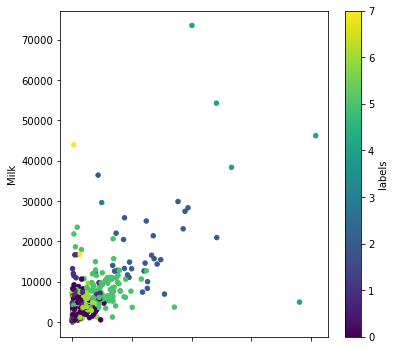

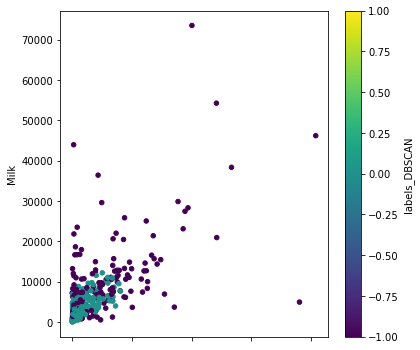

In [20]:
customers.plot.scatter(subplots=True, 
                       figsize=(6, 6), 
                       x="Detergents_Paper", 
                       y="Milk", 
                       c="labels", 
                       colormap="viridis")

customers.plot.scatter(subplots=True, 
                       figsize=(6, 6), 
                       x="Detergents_Paper", 
                       y="Milk", 
                       c="labels_DBSCAN", 
                       colormap="viridis");

- Plot `Grocery` vs. `Fresh` using the labels to color the scatter plot. Interpret the graph in the comments of the cell below.

In [ ]:
# Your code here

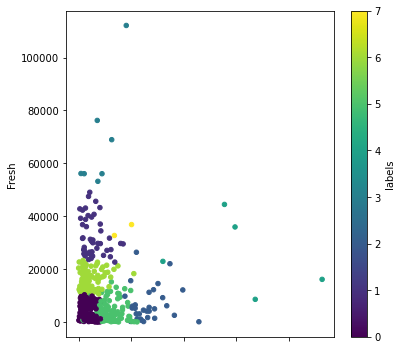

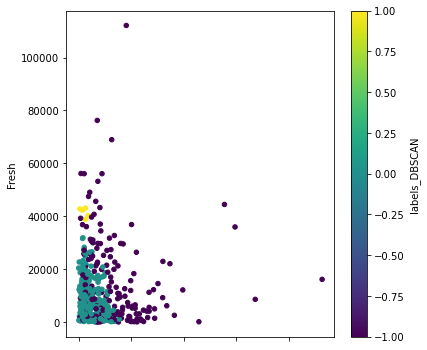

In [21]:
customers.plot.scatter(subplots=True, 
                       figsize=(6, 6), 
                       x="Grocery", 
                       y="Fresh", 
                       c="labels", 
                       colormap="viridis")

customers.plot.scatter(subplots=True, 
                       figsize=(6, 6), 
                       x="Grocery", 
                       y="Fresh", 
                       c="labels_DBSCAN", 
                       colormap="viridis");

- Plot `Frozen` vs. `Delicassen` using the labels to color the scatter plot. Interpret the graph in the comments of the cell below.

In [ ]:
# Your code here

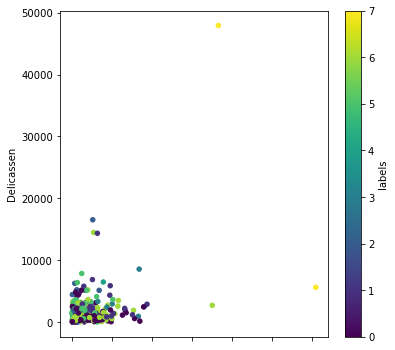

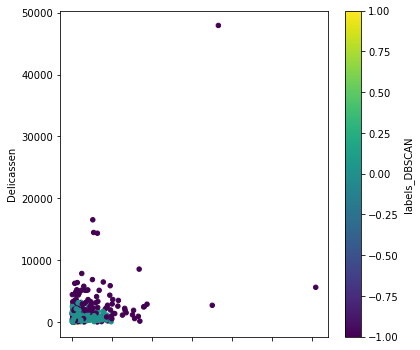

In [22]:
customers.plot.scatter(subplots=True, 
                       figsize=(6, 6), 
                       x="Frozen", 
                       y="Delicassen", 
                       c="labels", 
                       colormap="viridis")

customers.plot.scatter(subplots=True, 
                       figsize=(6, 6), 
                       x="Frozen", 
                       y="Delicassen", 
                       c="labels_DBSCAN", 
                       colormap="viridis");

- Let's use a groupby to see how the mean differs between the groups.
- Group `customers` by `labels` and compute the means for all columns.

In [ ]:
# Your code here

In [23]:
customers.groupby("labels").mean()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,labels_DBSCAN
labels,,,,,,,
0,4889.064935,2520.688312,3067.883117,2549.740260,825.162338,836.389610,-0.155844
1,32085.083333,5010.083333,5634.958333,4368.270833,1009.458333,2074.687500,-0.604167
2,6683.066667,17468.033333,26658.933333,1986.300000,11872.900000,2531.200000,-1.000000
3,68409.714286,7298.857143,8161.000000,11348.428571,1409.428571,3061.000000,-1.000000
4,25603.000000,43460.600000,61472.200000,2636.000000,29974.200000,2708.800000,-1.000000
5,4443.229885,8716.586207,12616.689655,1456.172414,5391.333333,1512.425287,-0.551724
6,16108.700935,2898.822430,4298.373832,3486.121495,989.224299,1369.289720,-0.224299
7,34782.000000,30367.000000,16898.000000,48701.500000,755.500000,26776.000000,-1.000000


- Group `customers` and `labels_DBSCAN` and compute the means for all columns.

In [ ]:
# Your code here

In [24]:
customers.groupby("labels_DBSCAN").mean()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,labels
labels_DBSCAN,,,,,,,
-1,15608.988506,10000.408046,13693.298851,4786.275862,5291.373563,2510.781609,3.063218
0,9030.398467,3077.318008,4234.061303,1963.432950,1322.134100,881.773946,2.689655
1,41446.600000,1421.200000,2167.600000,1276.400000,416.200000,784.800000,1.000000


## Bonus - Changing K-Means Number of Clusters

As we mentioned earlier, we don't need to worry about the number of clusters with DBSCAN because it automatically decides that based on the parameters we send to it. But with K-Means, we have to supply the `n_clusters` param (if you don't supply `n_clusters`, the algorithm will use `8` by default). You need to know that the optimal number of clusters differs case by case based on the dataset. K-Means can perform badly if the wrong number of clusters is used.

In advanced machine learning, data scientists try different numbers of clusters and evaluate the results with statistical measures (read [here](https://en.wikipedia.org/wiki/Cluster_analysis#External_evaluation)). We are not using statistical measures today but we'll use our eyes instead.
- In the cells below, experiment with different numbers of clusters and visualize with scatter plot. 
- What number of clusters seems to work best for K-Means?

In [ ]:
# Your code here



 Number of clusters: 2 




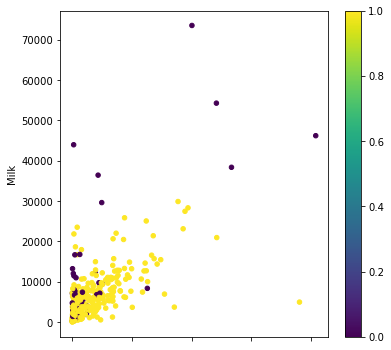



 Number of clusters: 3 




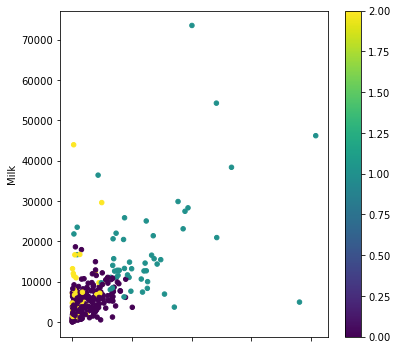



 Number of clusters: 4 




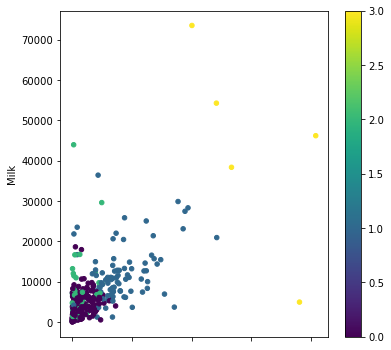



 Number of clusters: 5 




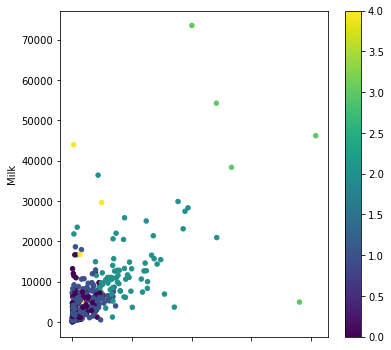



 Number of clusters: 6 




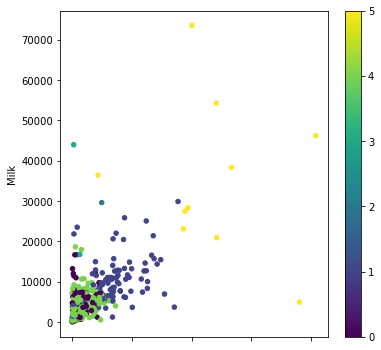



 Number of clusters: 7 




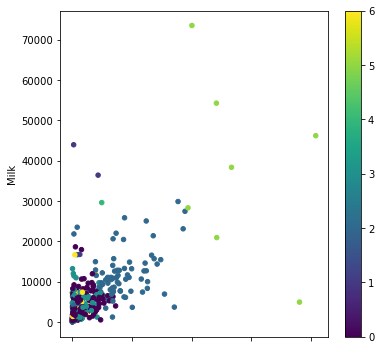



 Number of clusters: 8 




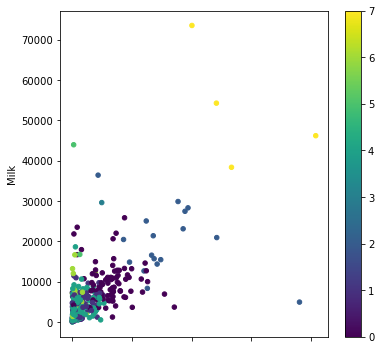

In [25]:
# example if columns 'Detergents_Paper' and 'Milk'

from sklearn.cluster import KMeans

for i in range(2, 9):
    
    print('\n\n Number of clusters:', i, '\n\n')
    
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(customers)
    customers.plot.scatter(subplots=True, 
                           figsize=(6, 6), 
                           x="Detergents_Paper", 
                           y="Milk", 
                           c=kmeans.labels_, 
                           colormap="viridis")
    plt.show()

## Bonus - Changing DBSCAN eps and min_samples
- Experiment changing the eps and min_samples params for DBSCAN. See how the results differ with  scatter plot visualization.

In [ ]:
# Your code here

In [26]:
dbscan = DBSCAN(eps=0.6, min_samples =3)
customers_dbscan = dbscan.fit(customers_scale)
customers['labels_DBSCAN_changed'] = customers_dbscan.labels_

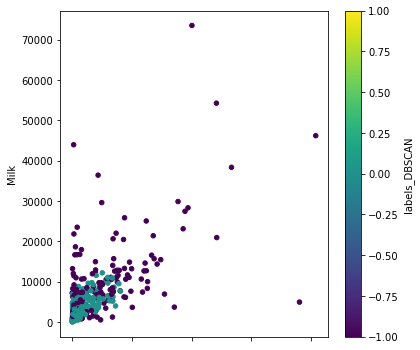

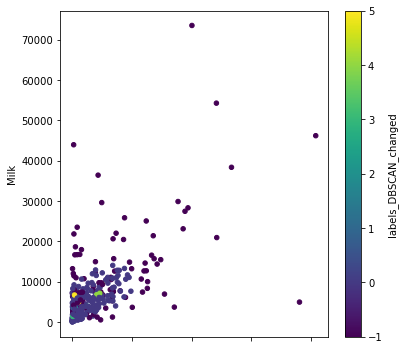

In [27]:
customers.plot.scatter(subplots=True, 
                       figsize=(6, 6), 
                       x="Detergents_Paper", 
                       y="Milk", 
                       c="labels_DBSCAN", 
                       colormap="viridis")

customers.plot.scatter(subplots=True, 
                       figsize=(6, 6), 
                       x="Detergents_Paper", 
                       y="Milk", 
                       c="labels_DBSCAN_changed", 
                       colormap="viridis");